In [1]:
from anharm.Hamiltonian import Hamil
import sympy as sp
from matplotlib import pyplot as plt, colors
import numpy as np

In [3]:
H = Hamil(3, 4, "triang")
e = H.split_deltas(H.zzexpr("101"))
f,vars = H.lambdify_expr(e)
print(vars)
e

[\alpha_{0}, \alpha_{1}, \alpha_{2}, g_{0,1}, g_{1,2}, g_{0,2}, \Delta_{0,1}, \Delta_{1,2}]


2*g_{0,1}**2*g_{0,2}**2*(1/(4*(\Delta_{0,1} + \Delta_{1,2})*(\Delta_{0,1} + \alpha_{0})*(-\Delta_{0,1} - \Delta_{1,2} - \alpha_{0})) + 3/(4*\Delta_{0,1}*(\Delta_{0,1} + \alpha_{0})*(-\Delta_{0,1} - \Delta_{1,2} - \alpha_{0})) - 3/(4*\Delta_{0,1}*(\Delta_{0,1} + \Delta_{1,2})*(-\Delta_{0,1} - \Delta_{1,2} - \alpha_{0})) + 1/(4*\Delta_{0,1}*(\Delta_{0,1} + \Delta_{1,2})*(\Delta_{0,1} + \alpha_{0}))) + 3*g_{0,1}**2*g_{0,2}**2/((\Delta_{0,1} + \alpha_{0})*(-\Delta_{0,1} - \Delta_{1,2} - \alpha_{0})**2) - g_{0,1}**2*g_{0,2}**2/((\Delta_{0,1} + \alpha_{0})**2*(-\Delta_{0,1} - \Delta_{1,2} - \alpha_{0})) + g_{0,1}**2*g_{1,2}**2*(-1/(-\Delta_{0,1} - \alpha_{0}) - 1/\Delta_{1,2})**2/(2*(-\Delta_{0,1} - \Delta_{1,2} - \alpha_{0})) + g_{0,1}**2*g_{1,2}**2*(-1/(\Delta_{1,2} - \alpha_{2}) + 1/\Delta_{0,1})**2/(2*(\Delta_{0,1} + \Delta_{1,2} - \alpha_{2})) + 2*g_{0,1}**2*g_{1,2}**2*(-1/(4*\Delta_{1,2}*(-\Delta_{0,1} + \alpha_{1})*(-\Delta_{1,2} - \alpha_{1})) + 1/(4*\Delta_{0,1}*(-\Delta_{0,1} + \al

Which sinigularities/crossings do we have?

$\Delta_{0,1}$

- $\Delta_{0,1} = -\alpha_0$
- $\Delta_{0,1} = \alpha_1$


$\Delta_{0,2}$

- $\Delta_{0,2} = -\alpha_0$
- $\Delta_{0,2} = \alpha_2$

$\Delta_{1,2}$

- $\Delta_{1,2} = \alpha_2$
- $\Delta_{1,2} = -\alpha_1$

mixed

- $-2 \Delta_{0,1} - \Delta_{1,2} - 3 \alpha_{0} =0$
- $ \Delta_{0,1} - \Delta_{1,2} - 3 \alpha_{1}   =0$
- $ \Delta_{0,1} + 2 \Delta_{1,2} - 3 \alpha_{2} =0$

In [ ]:
def draw_sing(d01_grid, d12_grid,alpha0,alpha1,alpha2):
    np.argmin(np.abs(d01_grid +alpha0), axis=1)
    np.argmin(np.abs(d01_grid -alpha1), axis=1)

    np.argmin(np.abs(d12_grid +alpha1), axis=1)
    np.argmin(np.abs(d12_grid -alpha2), axis=1)

    np.argmin(np.abs(d12_grid -alpha2), axis=1)
    np.argmin(np.abs(d12_grid -alpha2), axis=1)




In [7]:
H = Hamil(3, 4, "triang")
s = H.get_subspace(3)
e1 = s.get_4loop_contraction("111", "021") + s.get_4loop_contraction("111", "201")
e2 = s.get_4loop_contraction("111", "120") + s.get_4loop_contraction("111", "102")
e3 = s.get_4loop_contraction("111", "210") + s.get_4loop_contraction("111", "012")
e4 = (
    s.get_4loop_contraction("111", "003")
    + s.get_4loop_contraction("111", "030")
    + s.get_4loop_contraction("111", "300")
)
display(e1+e2+e3)

(sqrt(2)*g_{0,1}*g_{0,2}/(\Delta_{0,2} - \alpha_{2}) + 2*sqrt(2)*g_{0,1}*g_{0,2}/(-\Delta_{0,1} - \alpha_{0}))**2/(\Delta_{1,2} - \alpha_{2}) + (2*sqrt(2)*g_{0,1}*g_{0,2}/(-\Delta_{0,2} - \alpha_{0}) + sqrt(2)*g_{0,1}*g_{0,2}/(\Delta_{0,1} - \alpha_{1}))**2/(-\Delta_{1,2} - \alpha_{1}) + (sqrt(2)*g_{0,1}*g_{1,2}/(\Delta_{1,2} - \alpha_{2}) + 2*sqrt(2)*g_{0,1}*g_{1,2}/(\Delta_{0,1} - \alpha_{1}))**2/(\Delta_{0,2} - \alpha_{2}) + (2*sqrt(2)*g_{0,1}*g_{1,2}/(-\Delta_{1,2} - \alpha_{1}) + sqrt(2)*g_{0,1}*g_{1,2}/(-\Delta_{0,1} - \alpha_{0}))**2/(-\Delta_{0,2} - \alpha_{0}) + (sqrt(2)*g_{0,2}*g_{1,2}/(-\Delta_{1,2} - \alpha_{1}) + 2*sqrt(2)*g_{0,2}*g_{1,2}/(\Delta_{0,2} - \alpha_{2}))**2/(\Delta_{0,1} - \alpha_{1}) + (2*sqrt(2)*g_{0,2}*g_{1,2}/(\Delta_{1,2} - \alpha_{2}) + sqrt(2)*g_{0,2}*g_{1,2}/(-\Delta_{0,2} - \alpha_{0}))**2/(-\Delta_{0,1} - \alpha_{0})

In [12]:
Ham = Hamil(3, 4, "triang")
edge: sp.Expr = Ham.getedges("110") # good
leg: sp.Expr = Ham.getlegs("110")
bird: sp.Expr = Ham.getbirds("110") # good
cycle3: sp.Expr = Ham.get3cycles("110")
cycle4: sp.Expr = Ham.get4cycles("110")
second: sp.Expr = Ham.getsecondedges("110", keep_2nd_coupling=True)
Ham.zzexpr("111", keep_second_coupling=True)

getall
getall
getall
getall


g^{(2)}_{003,111}**2/(\Delta_{0,1} + 2*\Delta_{1,2} - 3*\alpha_{2}) + g^{(2)}_{012,111}**2/(\Delta_{0,2} - \alpha_{2}) + g^{(2)}_{021,111}**2/(\Delta_{0,1} - \alpha_{1}) + g^{(2)}_{030,111}**2/(\Delta_{0,1} - \Delta_{1,2} - 3*\alpha_{1}) + g^{(2)}_{102,111}**2/(\Delta_{1,2} - \alpha_{2}) + g^{(2)}_{111,120}**2/(-\Delta_{1,2} - \alpha_{1}) + g^{(2)}_{111,201}**2/(-\Delta_{0,1} - \alpha_{0}) + g^{(2)}_{111,210}**2/(-\Delta_{0,2} - \alpha_{0}) + g^{(2)}_{111,300}**2/(-2*\Delta_{0,1} - \Delta_{1,2} - 3*\alpha_{0}) - 4*g_{0,1}**4/((-\Delta_{0,1} - \alpha_{0})*(\Delta_{0,1} - \alpha_{1})**2) - 4*g_{0,1}**4/((-\Delta_{0,1} - \alpha_{0})**2*(\Delta_{0,1} - \alpha_{1})) + 6*g_{0,1}**2*g_{0,2}**2*(-3/(4*(-\Delta_{0,1} - \alpha_{0})*(-\Delta_{0,2} - \alpha_{0})*(\Delta_{0,2} + 2*\alpha_{0})) + 1/(4*(-\Delta_{0,1} - 2*\alpha_{0})*(-\Delta_{0,2} - \alpha_{0})*(\Delta_{0,2} + 2*\alpha_{0})) + 1/(4*(-\Delta_{0,1} - 2*\alpha_{0})*(-\Delta_{0,1} - \alpha_{0})*(\Delta_{0,2} + 2*\alpha_{0})) + 3/(4*(-\De

In [28]:
# e = H.zzexpr("1111")-(H.zzexpr("1100")+H.zzexpr("0110")+H.zzexpr("0011")+H.zzexpr("1010")+H.zzexpr("0101")+H.zzexpr("1001"))
e = H.zzexpr("111")-(H.zzexpr("110")+H.zzexpr("101")+H.zzexpr("011"))
e = H.split_deltas(e) 
display(e)
f,vars = H.lambdify_expr(e)
vars

-2*g_{0,1}**2*g_{0,2}**2*(-3/(4*(-\Delta_{0,1} - \alpha_{0})*(\Delta_{0,1} + \Delta_{1,2})*(-\Delta_{0,1} - \Delta_{1,2} - \alpha_{0})) - 1/(4*\Delta_{0,1}*(\Delta_{0,1} + \Delta_{1,2})*(-\Delta_{0,1} - \Delta_{1,2} - \alpha_{0})) - 1/(4*\Delta_{0,1}*(-\Delta_{0,1} - \alpha_{0})*(-\Delta_{0,1} - \Delta_{1,2} - \alpha_{0})) - 3/(4*\Delta_{0,1}*(-\Delta_{0,1} - \alpha_{0})*(\Delta_{0,1} + \Delta_{1,2}))) + 4*g_{0,1}**2*g_{0,2}**2*(-3/(4*(-\Delta_{0,1} - \alpha_{0})*(\Delta_{0,1} + \Delta_{1,2} - \alpha_{2})*(-\Delta_{0,1} - \Delta_{1,2} - \alpha_{0} + \alpha_{2})) - 1/(4*\Delta_{0,1}*(\Delta_{0,1} + \Delta_{1,2} - \alpha_{2})*(-\Delta_{0,1} - \Delta_{1,2} - \alpha_{0} + \alpha_{2})) - 1/(4*\Delta_{0,1}*(-\Delta_{0,1} - \alpha_{0})*(-\Delta_{0,1} - \Delta_{1,2} - \alpha_{0} + \alpha_{2})) - 3/(4*\Delta_{0,1}*(-\Delta_{0,1} - \alpha_{0})*(\Delta_{0,1} + \Delta_{1,2} - \alpha_{2}))) - 2*g_{0,1}**2*g_{0,2}**2*(-1/(4*(\Delta_{0,1} + \Delta_{1,2})*(\Delta_{0,1} + \alpha_{0})*(-\Delta_{0,1} - \

[\alpha_{0},
 \alpha_{1},
 \alpha_{2},
 g_{0,1},
 g_{1,2},
 g_{0,2},
 \Delta_{0,1},
 \Delta_{1,2}]

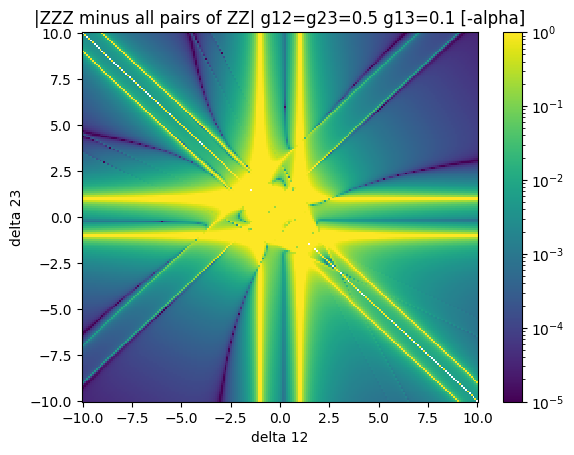

In [27]:
from matplotlib import pyplot as plt
from other.colormap import Norm, OrBu_colormap
from matplotlib import colors
g12 = 0.5
g23 = 0.5
g13 = 0.1
d34 = 3

dd = np.linspace(-10, 10, 200)
d12,d23 = np.meshgrid(dd,dd)
Z = f(-1,-1,-1, g12,g23,g13,d12,d23)
Z = np.abs(Z)
plt.pcolormesh(d12,d23, Z, norm=colors.LogNorm(1e-5,1e0))
plt.xlabel("delta 12")
plt.ylabel("delta 23")
plt.title(f"|ZZZ minus all pairs of ZZ| g12=g23=0.5 g13={g13} [-alpha]")
plt.colorbar()
plt.show()